## Stock Sentiment Analysis

![SENTIMENT ANALYSIS](https://stackabuse.s3.amazonaws.com/media/sentiment-analysis-in-python-with-textblob-1.jpg)

🧰Importing Necessary Libraries

In [186]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
import matplotlib.pyplot as plt

# Import Visualization Libraries
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns 
from IPython.display import IFrame
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import random 

We read and glimpse the data.

In [187]:
DF = df = pd.read_csv('reddit_stock_sentiment.csv')

We will also look into data quality, for example missing data.

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Author         200 non-null    object 
 1   Created At     200 non-null    float64
 2   Score          200 non-null    int64  
 3   Comment Count  200 non-null    int64  
 4   Title          200 non-null    object 
 5   Selftext       61 non-null     object 
 6   URL            200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


## 🏗️Data Preprocessing

In [189]:
df.head()

,Author,Created At,Score,Comment Count,Title,Selftext,URL
0,RandomInvestor98,1.727330e+09,31906,1644,Nancy Pelosi’s husband sold more than $500K wo...,NaN,https://nypost.com/2024/09/24/business/nancy-p...
1,Sad_Nefariousness10,1.722527e+09,29016,11819,I bought $700k worth of Intel stock today,https://preview.redd.it/83gh52szi2gd1.png?widt...,https://www.reddit.com/r/wallstreetbets/commen...
2,Efficient_Deer_8605,1.723558e+09,12336,1351,I bought $700k worth of Intel stock,I like the stock and I think it’s really cheap...,https://i.redd.it/0e790lxetfid1.jpeg
3,sco-go,1.722704e+09,14514,1089,To the guy who spent his 700k inheritance on I...,NaN,https://i.redd.it/d0cwjxtcchgd1.png
4,Suspicious-Bad4703,1.722820e+09,11757,1014,Japanese Stocks are Crashing,NaN,https://i.redd.it/zde570etxqgd1.jpeg


The whole body of the text was devided into two coloumns, "Selftext" column and "Text", 
so we will concatenate the two of them

In [190]:
# Concatenate two columns into a new column
df['Text'] = df['Title'].fillna('') + ' ' + df['Selftext'].fillna('')

# Drop the original 'Title' and 'Selftext' columns
df = df.drop(['Title', 'Selftext'], axis=1)

#print(df.head())


### Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [191]:
df.describe()

,Created At,Score,Comment Count
count,2.000000e+02,200.000000,200.000000
mean,1.683435e+09,18389.195000,1436.540000
std,3.853661e+07,23221.256957,2347.415178
min,1.611955e+09,1311.000000,183.000000
25%,1.654897e+09,3327.500000,568.500000
50%,1.700292e+09,7407.000000,980.500000
75%,1.715863e+09,26371.750000,1686.000000
max,1.727708e+09,117119.000000,29680.000000


> We have only 200 records.


We will use wordclouds to identify the most frequent words in the titles and body of the posts.

In [192]:
!pip install wordcloud

In [193]:
def show_wordcloud(df, title=""):
    text = " ".join(t for t in df.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["stock", "bearish", "bullish", "profit", "loss", "buy", "sell",""])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()


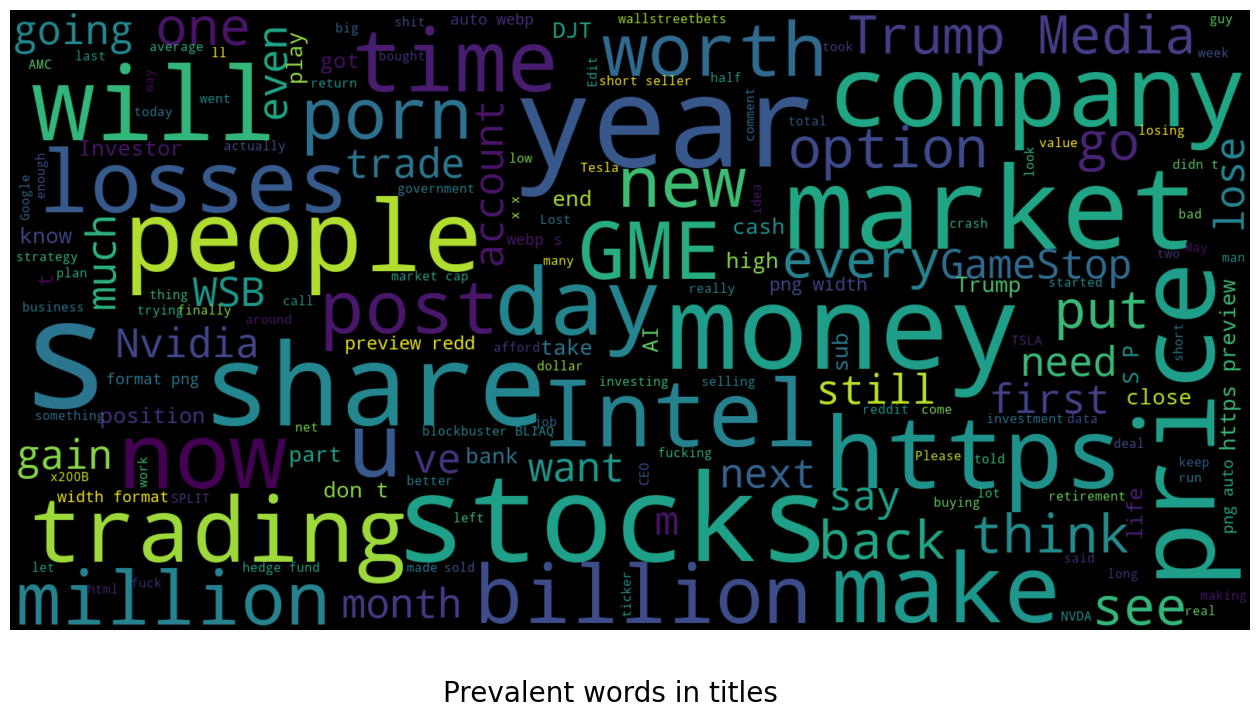

In [194]:
show_wordcloud(df['Text'], title = 'Prevalent words in titles')

## Sentiment Analysis
### NLTK Sentiment Intensity Analyzer

In [195]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### 📈EDA and Data Visualization

### Sentiment Intensity Analyzer:
This analyzer is pre-trained to evaluate the sentiment of a given text using a lexicon and rule-based approach. It can handle social media texts effectively.

In [196]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"  

Displaying the count and percentage distribution of sentiment values

In [197]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='yellow')
    percent.plot(kind='bar', ax=ax2, color='orange')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

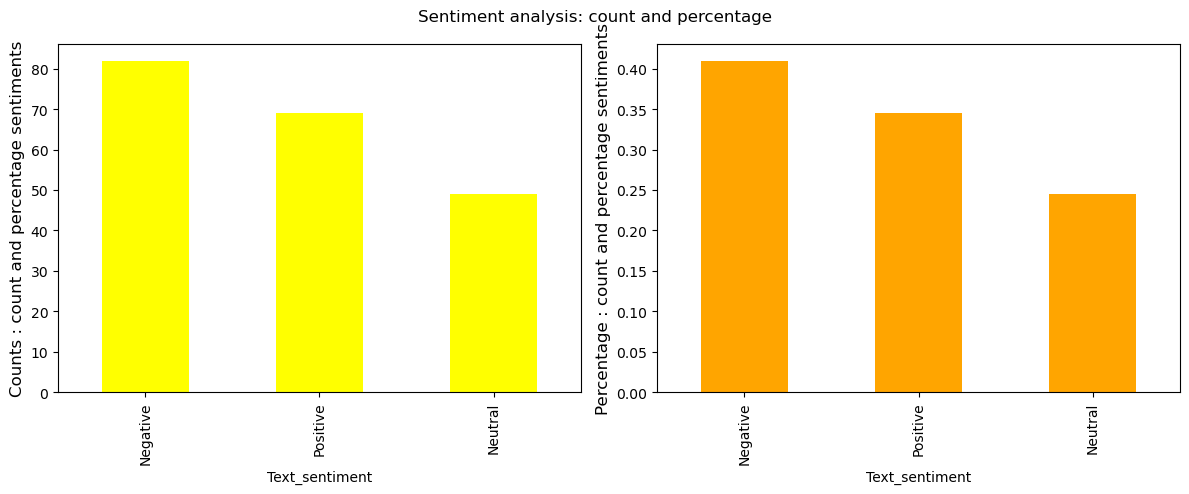

In [198]:
df['Text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))        #adding new column to df
plot_sentiment(df, 'Text_sentiment', 'count and percentage')

> 1.  A higher proportion of Negative sentiment often correlates with bearish behavior<br>
> 2.  Positive sentiment, though lower, may indicate that a smaller but notable group of people are optimistic or bullish about specific stocks.<br>
> 3.  Neutral sentiment indicate that the market is not showing clear directional signals based on this dataset.

### Most prevalent words in each of the POSITIVE, NEGATIVE and NEUTRAL sentiments of Text 

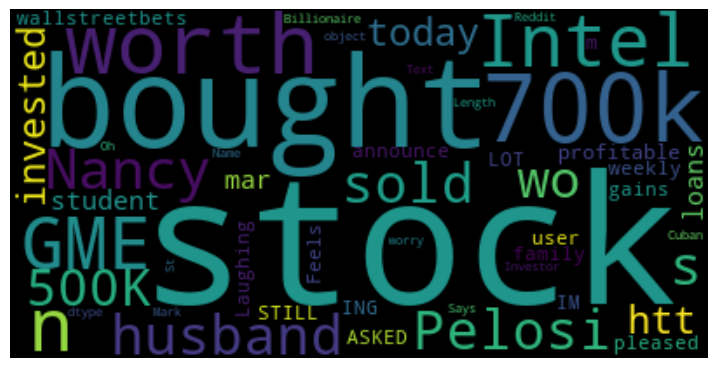

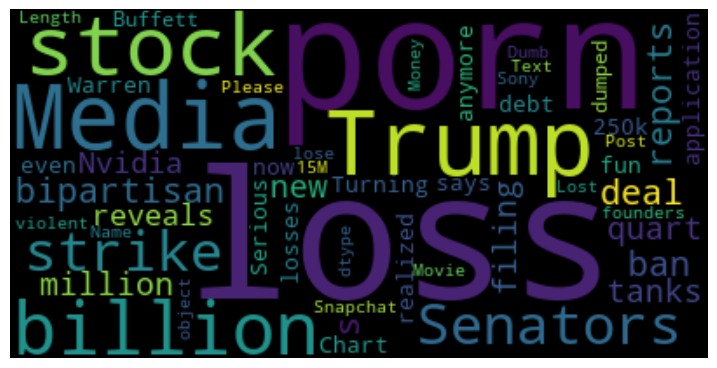

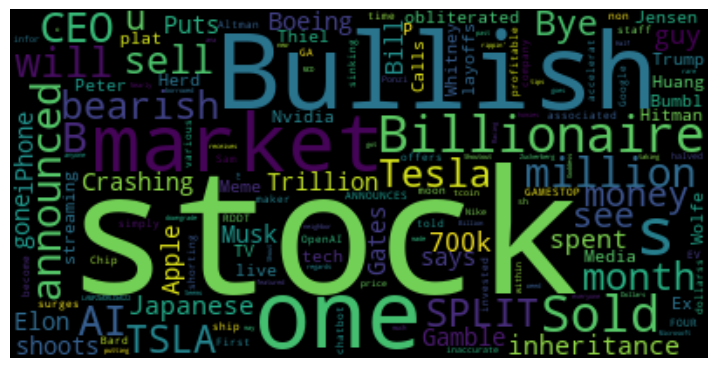

In [200]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color='black', max_words=200).generate(str(data))
    plt.figure(figsize=(9, 6))  # Smaller plot size
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.title( 'Prevalent words in titles (Positive sentiment)', size=15)
    plt.show()


show_wordcloud(df.loc[df['Text_sentiment']=='Positive', 'Text'], title = 'Prevalent words in body (Positive sentiment)')
show_wordcloud(df.loc[df['Text_sentiment']=='Negative', 'Text'], title = 'Prevalent words in body (Negative sentiment)')
show_wordcloud(df.loc[df['Text_sentiment']=='Neutral', 'Text'], title = 'Prevalent words in body (Neutal sentiment)')



In [201]:
df['Text_sentiment'].value_counts()

Text_sentiment
Negative    82
Positive    69
Neutral     49
Name: count, dtype: int64

> There is heighest of negative sentiments followed by positive and then neutral sentiments

Checking the average number of comments on the posts in the dataset

In [203]:
df['Comment Count'].sum()/df.shape[0]

1436.54

The distribution of the number of comments on posts.

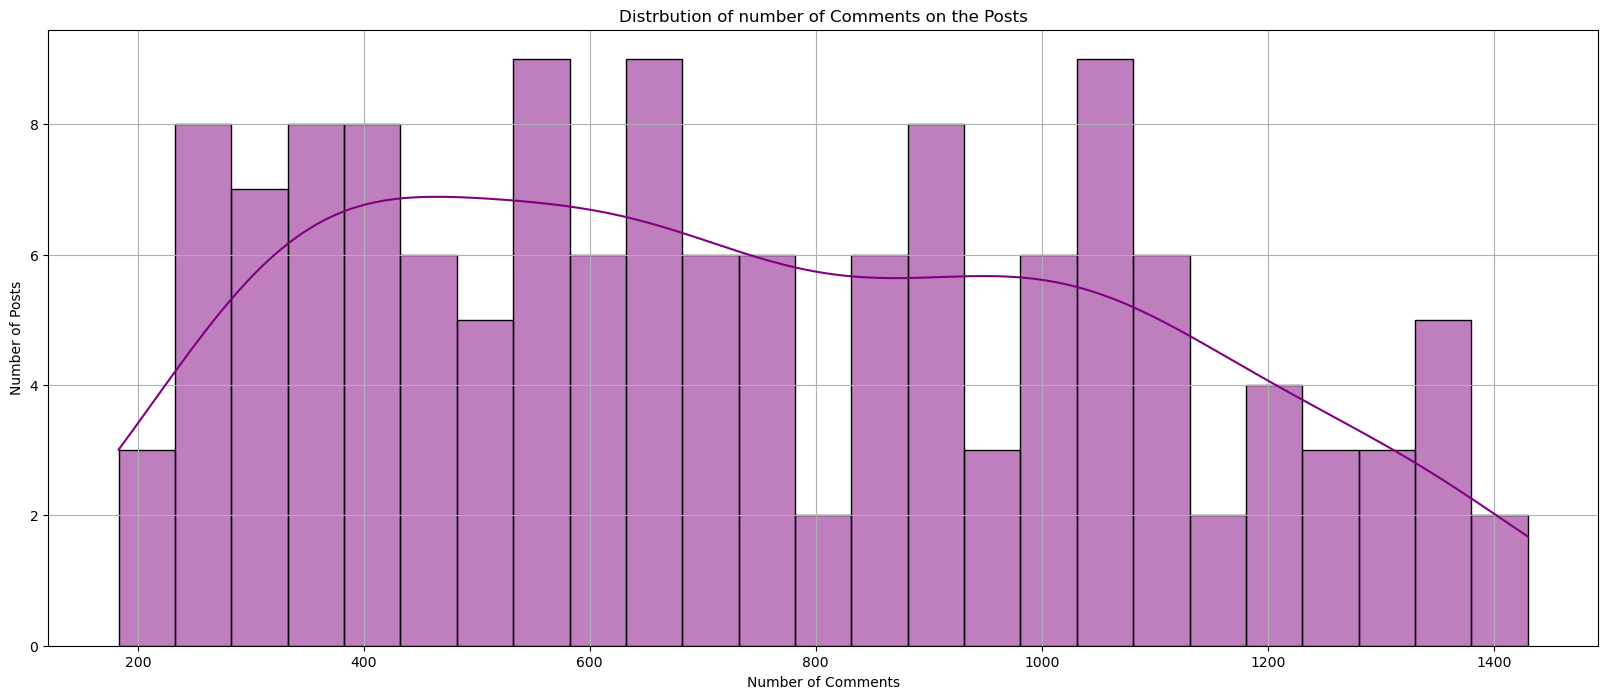

In [204]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.histplot(df[df['Comment Count'] < 1437]['Comment Count'], kde=True ,  binwidth=50 , color="purple")
#Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:

plt.grid()
plt.title("Distrbution of number of Comments on the Posts")
plt.ylabel("Number of Posts")
plt.xlabel("Number of Comments")

plt.show()

> 1. Most posts receive between 400-1000 comments, indicating high interaction.<br>
> 2. A right-skewed distribution suggests some posts gather more than 1200 comments.<br>
> 3. The distribution has multiple engagement clusters (multi-modal).

<Axes: >

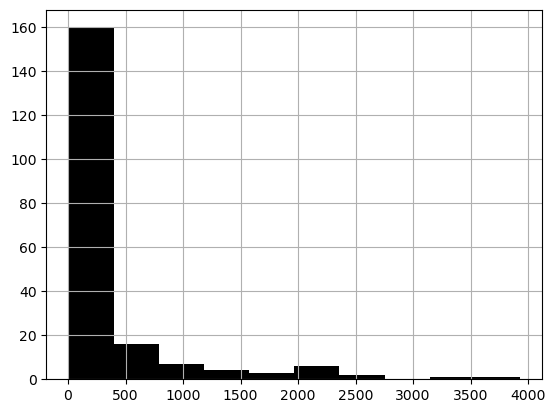

In [205]:
df['Text'].str.len().hist(color = 'black')

> 1. Most of the text entries have lengths under 500 characters<br>

Text(0.5, 1.0, 'Negative Reviews')

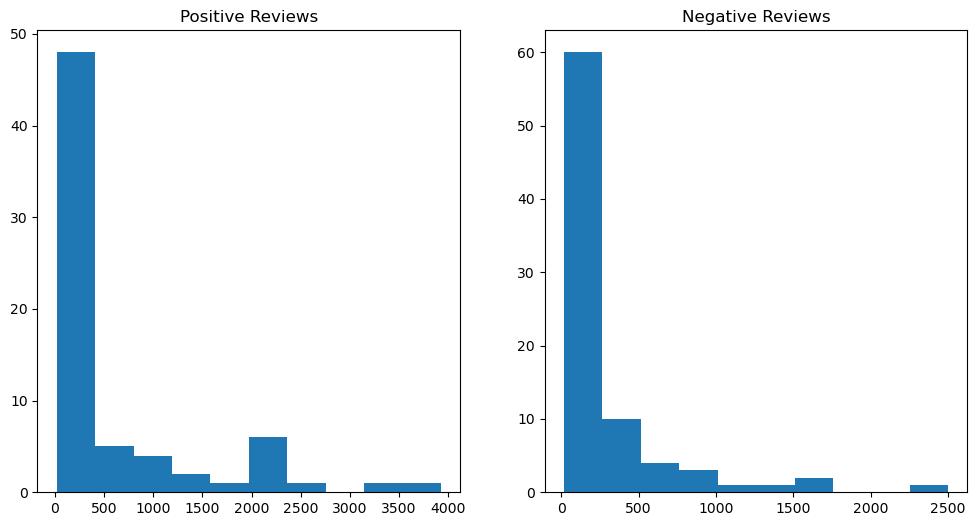

In [206]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.hist(df[df['Text_sentiment']=='Positive']['Text'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['Text_sentiment']=='Negative']['Text'].str.len())
ax2.set_title( 'Negative Reviews')

### cleaning data

In [207]:
import re
import string

def cleaning(Text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    Text = Text.lower() # converting to lowercase
    Text = re.sub('https?://\S+|www\.\S+', '', Text) # removing URL links
    Text = re.sub(r"\b\d+\b", "", Text) # removing number 
    Text = re.sub('<.*?>+', '', Text) # removing special characters, 
    Text = re.sub('[%s]' % re.escape(string.punctuation), '', Text) # punctuations
    Text = re.sub('\n', '',Text)
    Text = re.sub('[’“”…]', '', Text)
     
    return Text

<>:7: SyntaxWarning:

invalid escape sequence '\S'

<>:7: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\91829\AppData\Local\Temp\ipykernel_26228\934339352.py:7: SyntaxWarning:

invalid escape sequence '\S'



In [208]:
ddf = df['Text'].apply(cleaning)

In [209]:
ddf = pd.DataFrame(ddf)  
ddf['Text_sentiment']=df['Text_sentiment']
ddf

,Text,Text_sentiment
0,nancy pelosis husband sold more than 500k wort...,Positive
1,i bought 700k worth of intel stock today tldr...,Positive
2,i bought 700k worth of intel stock i like the ...,Positive
3,to the guy who spent his 700k inheritance on i...,Neutral
4,japanese stocks are crashing,Neutral
...,...,...
195,snapchat founders lose billions after violent ...,Negative
196,txse texas stock exchange announced yeehaw,Neutral
197,billionaire investor mark cuban says reddit st...,Positive
198,dumb money movie lost 15m sony please post yo...,Negative


In [210]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [211]:
ddf['cleaned_text'] = ddf['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [212]:
ddf

,Text,Text_sentiment,cleaned_text
0,nancy pelosis husband sold more than 500k wort...,Positive,nancy pelosis husband sold 500k worth visa sto...
1,i bought 700k worth of intel stock today tldr...,Positive,bought 700k worth intel stock today tldr grand...
2,i bought 700k worth of intel stock i like the ...,Positive,bought 700k worth intel stock stock cheap rn
3,to the guy who spent his 700k inheritance on i...,Neutral,guy spent 700k inheritance intel bullish
4,japanese stocks are crashing,Neutral,japanese stocks crashing
...,...,...,...
195,snapchat founders lose billions after violent ...,Negative,snapchat founders lose billions violent stock ...
196,txse texas stock exchange announced yeehaw,Neutral,txse texas stock exchange announced yeehaw
197,billionaire investor mark cuban says reddit st...,Positive,billionaire investor mark cuban reddit stock t...
198,dumb money movie lost 15m sony please post yo...,Negative,dumb money movie lost 15m sony post losses wsb...


In [213]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in ddf["cleaned_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp.style.background_gradient(cmap='Purples')


,word,count
0,stock,158
1,market,55
2,loss,53
3,money,45
4,stocks,44
5,shares,38
6,years,34
7,intel,27
8,million,27
9,buy,26


In [262]:
import plotly.express as px

#data = {'word': ['stock', 'market', 'loss', 'money', 'stocks'], 'count': [158, 55, 53, 45, 44]}
fig = px.bar(temp, x='word', y='count', color='word', title='Top 10 Word Frequencies',width= 800,height=400,template="plotly_dark")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Text_sentiment_x', 'Text_x'] but received: word

### removing the most frequent words

In [215]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
ddf["cc_text"] = ddf["cleaned_text"].apply(lambda text: remove_freqwords(text))
ddf.head()

,Text,Text_sentiment,cleaned_text,cc_text
0,nancy pelosis husband sold more than 500k wort...,Positive,nancy pelosis husband sold 500k worth visa sto...,nancy pelosis husband sold 500k worth visa — w...
1,i bought 700k worth of intel stock today tldr...,Positive,bought 700k worth intel stock today tldr grand...,bought 700k worth today tldr grandma died mont...
2,i bought 700k worth of intel stock i like the ...,Positive,bought 700k worth intel stock stock cheap rn,bought 700k worth cheap rn
3,to the guy who spent his 700k inheritance on i...,Neutral,guy spent 700k inheritance intel bullish,guy spent 700k inheritance bullish
4,japanese stocks are crashing,Neutral,japanese stocks crashing,japanese crashing


checking

In [216]:
ddf['cc_text'].loc[5]

'senators strike bipartisan deal ban trading members congress'

> <u>Lemmatization:</u> Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
> It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.

In [217]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [218]:
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()

ddf['lemma_cleaned_text'] = ddf['cc_text'].apply(wordnet_lem.lemmatize)
ddf

,Text,Text_sentiment,cleaned_text,cc_text,lemma_cleaned_text
0,nancy pelosis husband sold more than 500k wort...,Positive,nancy pelosis husband sold 500k worth visa sto...,nancy pelosis husband sold 500k worth visa — w...,nancy pelosis husband sold 500k worth visa — w...
1,i bought 700k worth of intel stock today tldr...,Positive,bought 700k worth intel stock today tldr grand...,bought 700k worth today tldr grandma died mont...,bought 700k worth today tldr grandma died mont...
2,i bought 700k worth of intel stock i like the ...,Positive,bought 700k worth intel stock stock cheap rn,bought 700k worth cheap rn,bought 700k worth cheap rn
3,to the guy who spent his 700k inheritance on i...,Neutral,guy spent 700k inheritance intel bullish,guy spent 700k inheritance bullish,guy spent 700k inheritance bullish
4,japanese stocks are crashing,Neutral,japanese stocks crashing,japanese crashing,japanese crashing
...,...,...,...,...,...
195,snapchat founders lose billions after violent ...,Negative,snapchat founders lose billions violent stock ...,snapchat founders lose billions violent crash,snapchat founders lose billions violent crash
196,txse texas stock exchange announced yeehaw,Neutral,txse texas stock exchange announced yeehaw,txse texas exchange announced yeehaw,txse texas exchange announced yeehaw
197,billionaire investor mark cuban says reddit st...,Positive,billionaire investor mark cuban reddit stock t...,billionaire investor mark cuban reddit traders...,billionaire investor mark cuban reddit traders...
198,dumb money movie lost 15m sony please post yo...,Negative,dumb money movie lost 15m sony post losses wsb...,dumb movie lost 15m sony post losses wsb surpr...,dumb movie lost 15m sony post losses wsb surpr...


In [219]:
df

,Author,Created At,Score,Comment Count,URL,Text,Text_sentiment
0,RandomInvestor98,1.727330e+09,31906,1644,https://nypost.com/2024/09/24/business/nancy-p...,Nancy Pelosi’s husband sold more than $500K wo...,Positive
1,Sad_Nefariousness10,1.722527e+09,29016,11819,https://www.reddit.com/r/wallstreetbets/commen...,I bought $700k worth of Intel stock today htt...,Positive
2,Efficient_Deer_8605,1.723558e+09,12336,1351,https://i.redd.it/0e790lxetfid1.jpeg,I bought $700k worth of Intel stock I like the...,Positive
3,sco-go,1.722704e+09,14514,1089,https://i.redd.it/d0cwjxtcchgd1.png,To the guy who spent his 700k inheritance on I...,Neutral
4,Suspicious-Bad4703,1.722820e+09,11757,1014,https://i.redd.it/zde570etxqgd1.jpeg,Japanese Stocks are Crashing,Neutral
...,...,...,...,...,...,...,...
195,AtmosphereNo6743,1.707342e+09,3667,277,https://www.forbes.com.au/news/investing/snapc...,Snapchat founders lose billions after 'violent...,Negative
196,Noobmode,1.717642e+09,1582,405,https://i.redd.it/6m77017m7v4d1.jpeg,"TXSE (Texas Stock Exchange) announced, yeehaw.",Neutral
197,superanth,1.612206e+09,98626,1377,https://www.unilad.co.uk/news/billionaire-inve...,Billionaire Investor Mark Cuban Says Reddit St...,Positive
198,B3stAuD1t0rofA11tiME,1.697384e+09,3214,515,https://www.reddit.com/r/wallstreetbets/commen...,Dumb Money Movie Lost $15M - Sony Please Post ...,Negative


In [220]:
import pandas as pd

# Assuming your dataframes are named df and ddf
the_df = merged_df = pd.merge(df, ddf, left_index=True, right_index=True, how='inner')

print(the_df)

                   Author    Created At  Score  Comment Count  \
0        RandomInvestor98  1.727330e+09  31906           1644   
1     Sad_Nefariousness10  1.722527e+09  29016          11819   
2     Efficient_Deer_8605  1.723558e+09  12336           1351   
3                  sco-go  1.722704e+09  14514           1089   
4      Suspicious-Bad4703  1.722820e+09  11757           1014   
..                    ...           ...    ...            ...   
195      AtmosphereNo6743  1.707342e+09   3667            277   
196              Noobmode  1.717642e+09   1582            405   
197             superanth  1.612206e+09  98626           1377   
198  B3stAuD1t0rofA11tiME  1.697384e+09   3214            515   
199              Slyver12  1.612322e+09  28096           2124   

                                                   URL  \
0    https://nypost.com/2024/09/24/business/nancy-p...   
1    https://www.reddit.com/r/wallstreetbets/commen...   
2                 https://i.redd.it/0e790lxet

In [221]:
the_df

,Author,Created At,Score,Comment Count,URL,Text_x,Text_sentiment_x,Text_y,Text_sentiment_y,cleaned_text,cc_text,lemma_cleaned_text
0,RandomInvestor98,1.727330e+09,31906,1644,https://nypost.com/2024/09/24/business/nancy-p...,Nancy Pelosi’s husband sold more than $500K wo...,Positive,nancy pelosis husband sold more than 500k wort...,Positive,nancy pelosis husband sold 500k worth visa sto...,nancy pelosis husband sold 500k worth visa — w...,nancy pelosis husband sold 500k worth visa — w...
1,Sad_Nefariousness10,1.722527e+09,29016,11819,https://www.reddit.com/r/wallstreetbets/commen...,I bought $700k worth of Intel stock today htt...,Positive,i bought 700k worth of intel stock today tldr...,Positive,bought 700k worth intel stock today tldr grand...,bought 700k worth today tldr grandma died mont...,bought 700k worth today tldr grandma died mont...
2,Efficient_Deer_8605,1.723558e+09,12336,1351,https://i.redd.it/0e790lxetfid1.jpeg,I bought $700k worth of Intel stock I like the...,Positive,i bought 700k worth of intel stock i like the ...,Positive,bought 700k worth intel stock stock cheap rn,bought 700k worth cheap rn,bought 700k worth cheap rn
3,sco-go,1.722704e+09,14514,1089,https://i.redd.it/d0cwjxtcchgd1.png,To the guy who spent his 700k inheritance on I...,Neutral,to the guy who spent his 700k inheritance on i...,Neutral,guy spent 700k inheritance intel bullish,guy spent 700k inheritance bullish,guy spent 700k inheritance bullish
4,Suspicious-Bad4703,1.722820e+09,11757,1014,https://i.redd.it/zde570etxqgd1.jpeg,Japanese Stocks are Crashing,Neutral,japanese stocks are crashing,Neutral,japanese stocks crashing,japanese crashing,japanese crashing
...,...,...,...,...,...,...,...,...,...,...,...,...
195,AtmosphereNo6743,1.707342e+09,3667,277,https://www.forbes.com.au/news/investing/snapc...,Snapchat founders lose billions after 'violent...,Negative,snapchat founders lose billions after violent ...,Negative,snapchat founders lose billions violent stock ...,snapchat founders lose billions violent crash,snapchat founders lose billions violent crash
196,Noobmode,1.717642e+09,1582,405,https://i.redd.it/6m77017m7v4d1.jpeg,"TXSE (Texas Stock Exchange) announced, yeehaw.",Neutral,txse texas stock exchange announced yeehaw,Neutral,txse texas stock exchange announced yeehaw,txse texas exchange announced yeehaw,txse texas exchange announced yeehaw
197,superanth,1.612206e+09,98626,1377,https://www.unilad.co.uk/news/billionaire-inve...,Billionaire Investor Mark Cuban Says Reddit St...,Positive,billionaire investor mark cuban says reddit st...,Positive,billionaire investor mark cuban reddit stock t...,billionaire investor mark cuban reddit traders...,billionaire investor mark cuban reddit traders...
198,B3stAuD1t0rofA11tiME,1.697384e+09,3214,515,https://www.reddit.com/r/wallstreetbets/commen...,Dumb Money Movie Lost $15M - Sony Please Post ...,Negative,dumb money movie lost 15m sony please post yo...,Negative,dumb money movie lost 15m sony post losses wsb...,dumb movie lost 15m sony post losses wsb surpr...,dumb movie lost 15m sony post losses wsb surpr...


In [ ]:
# corr=train_df.groupby('SecuritiesCode')[['Target','Close']].corr().unstack().iloc[:,1]
# stocks=corr.nlargest(10).rename("Return").reset_index()
# stocks=stocks.merge(train_df[['Name','SecuritiesCode']], on='SecuritiesCode').drop_duplicates()
# pal=sns.color_palette("magma_r", 14).as_hex()
# rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

# fig = go.Figure()
# fig.add_trace(go.Bar(x=stocks.Name, y=stocks.Return, text=stocks.Return, 
#                      texttemplate='%{text:.2f}', name='', width=0.8,
#                      textposition='outside',marker=dict(color=rgb, line=dict(color=pal,width=1)),
#                      hovertemplate='Correlation of %{x} with target = %{y:.3f}'))
# fig.update_layout(template=temp, title='Most Correlated Stocks with Target Variable',
#                   yaxis=dict(title='Correlation',showticklabels=False), 
#                   xaxis=dict(title='Stock',tickangle=45), margin=dict(b=100),
#                   width=800,height=500)
# fig.show()

In [222]:
the_df = the_df.drop(columns='Text_y' , axis=1)
the_df = the_df.drop(columns='Text_sentiment_y' , axis=1)
the_df = the_df.drop(columns='URL' , axis=1)

In [223]:
the_df

,Author,Created At,Score,Comment Count,Text_x,Text_sentiment_x,cleaned_text,cc_text,lemma_cleaned_text
0,RandomInvestor98,1.727330e+09,31906,1644,Nancy Pelosi’s husband sold more than $500K wo...,Positive,nancy pelosis husband sold 500k worth visa sto...,nancy pelosis husband sold 500k worth visa — w...,nancy pelosis husband sold 500k worth visa — w...
1,Sad_Nefariousness10,1.722527e+09,29016,11819,I bought $700k worth of Intel stock today htt...,Positive,bought 700k worth intel stock today tldr grand...,bought 700k worth today tldr grandma died mont...,bought 700k worth today tldr grandma died mont...
2,Efficient_Deer_8605,1.723558e+09,12336,1351,I bought $700k worth of Intel stock I like the...,Positive,bought 700k worth intel stock stock cheap rn,bought 700k worth cheap rn,bought 700k worth cheap rn
3,sco-go,1.722704e+09,14514,1089,To the guy who spent his 700k inheritance on I...,Neutral,guy spent 700k inheritance intel bullish,guy spent 700k inheritance bullish,guy spent 700k inheritance bullish
4,Suspicious-Bad4703,1.722820e+09,11757,1014,Japanese Stocks are Crashing,Neutral,japanese stocks crashing,japanese crashing,japanese crashing
...,...,...,...,...,...,...,...,...,...
195,AtmosphereNo6743,1.707342e+09,3667,277,Snapchat founders lose billions after 'violent...,Negative,snapchat founders lose billions violent stock ...,snapchat founders lose billions violent crash,snapchat founders lose billions violent crash
196,Noobmode,1.717642e+09,1582,405,"TXSE (Texas Stock Exchange) announced, yeehaw.",Neutral,txse texas stock exchange announced yeehaw,txse texas exchange announced yeehaw,txse texas exchange announced yeehaw
197,superanth,1.612206e+09,98626,1377,Billionaire Investor Mark Cuban Says Reddit St...,Positive,billionaire investor mark cuban reddit stock t...,billionaire investor mark cuban reddit traders...,billionaire investor mark cuban reddit traders...
198,B3stAuD1t0rofA11tiME,1.697384e+09,3214,515,Dumb Money Movie Lost $15M - Sony Please Post ...,Negative,dumb money movie lost 15m sony post losses wsb...,dumb movie lost 15m sony post losses wsb surpr...,dumb movie lost 15m sony post losses wsb surpr...


## now the data is perfectly clean

### extracting DATE from Unix time stamp

In [224]:
import pandas as pd
from datetime import datetime 

def convert_and_merge_timestamps(the_df):
    # Convert 'Created At' column to timestamps and then to datetime
    timestamps = the_df['Created At'].values
    
    # Create conversion results
    dates = [datetime.fromtimestamp(ts) for ts in timestamps]
    
    # Create a temporary DataFrame with converted dates
    date_df = pd.DataFrame({
        'Created At': timestamps,  # Keep original for merging
        'Date': [d.strftime('%Y-%m-%d') for d in dates],
        'Time': [d.strftime('%H:%M:%S') for d in dates],
        'Full Datetime': [d.strftime('%Y-%m-%d %H:%M:%S') for d in dates]
    })
    
    # Merge with original DataFrame
    df_merged = the_df.merge(date_df, on='Created At', how='left')
    
    return df_merged

# Apply the conversion and merge
df_with_dates = convert_and_merge_timestamps(the_df)

### extracting imp infromation from date and time

In [225]:
import datetime as dt
year = []
month = []
day = []
hour = []
date = []
for i in range(len(df_with_dates)):
    datestamp = dt.datetime.strptime(df_with_dates.loc[(i,'Full Datetime')], '%Y-%m-%d %H:%M:%S')
    year.append(datestamp.date().year)
    month.append(datestamp.date().month)
    day.append(datestamp.date().day)
    hour.append(datestamp.time().hour)
    date.append(datestamp.date())

In [226]:
# Append the date information to our dataframe
the_df['year'] = year
the_df['month'] = month
the_df['day'] = day
the_df['hour'] = hour
the_df['date'] = date

In [227]:
the_df = the_df.drop(columns="Created At" , axis= 1)
#df = df.drop(columns="URL" , axis= 1)


In [228]:
the_df

,Author,Score,Comment Count,Text_x,Text_sentiment_x,cleaned_text,cc_text,lemma_cleaned_text,year,month,day,hour,date
0,RandomInvestor98,31906,1644,Nancy Pelosi’s husband sold more than $500K wo...,Positive,nancy pelosis husband sold 500k worth visa sto...,nancy pelosis husband sold 500k worth visa — w...,nancy pelosis husband sold 500k worth visa — w...,2024,9,26,11,2024-09-26
1,Sad_Nefariousness10,29016,11819,I bought $700k worth of Intel stock today htt...,Positive,bought 700k worth intel stock today tldr grand...,bought 700k worth today tldr grandma died mont...,bought 700k worth today tldr grandma died mont...,2024,8,1,21,2024-08-01
2,Efficient_Deer_8605,12336,1351,I bought $700k worth of Intel stock I like the...,Positive,bought 700k worth intel stock stock cheap rn,bought 700k worth cheap rn,bought 700k worth cheap rn,2024,8,13,19,2024-08-13
3,sco-go,14514,1089,To the guy who spent his 700k inheritance on I...,Neutral,guy spent 700k inheritance intel bullish,guy spent 700k inheritance bullish,guy spent 700k inheritance bullish,2024,8,3,22,2024-08-03
4,Suspicious-Bad4703,11757,1014,Japanese Stocks are Crashing,Neutral,japanese stocks crashing,japanese crashing,japanese crashing,2024,8,5,6,2024-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,AtmosphereNo6743,3667,277,Snapchat founders lose billions after 'violent...,Negative,snapchat founders lose billions violent stock ...,snapchat founders lose billions violent crash,snapchat founders lose billions violent crash,2024,2,8,3,2024-02-08
196,Noobmode,1582,405,"TXSE (Texas Stock Exchange) announced, yeehaw.",Neutral,txse texas stock exchange announced yeehaw,txse texas exchange announced yeehaw,txse texas exchange announced yeehaw,2024,6,6,8,2024-06-06
197,superanth,98626,1377,Billionaire Investor Mark Cuban Says Reddit St...,Positive,billionaire investor mark cuban reddit stock t...,billionaire investor mark cuban reddit traders...,billionaire investor mark cuban reddit traders...,2021,2,2,0,2021-02-02
198,B3stAuD1t0rofA11tiME,3214,515,Dumb Money Movie Lost $15M - Sony Please Post ...,Negative,dumb money movie lost 15m sony post losses wsb...,dumb movie lost 15m sony post losses wsb surpr...,dumb movie lost 15m sony post losses wsb surpr...,2023,10,15,20,2023-10-15


In [230]:
import plotly.express as px
import pandas as pd

# ***IMPORTANT: Sort the DataFrame by date***
the_dff = the_df.sort_values('date')

fig = px.line(the_dff, 
              x='date', 
              y='Score', 
              range_x=['2021-07-01', '2024-12-31'],  # Optional range restriction
              title='Time Series with Rangeslider',
              template='plotly_dark')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [231]:
#sentiment count: 
the_df['Text_sentiment_x'].value_counts()

Text_sentiment_x
Negative    82
Positive    69
Neutral     49
Name: count, dtype: int64

In [232]:
temp = the_df.groupby('Text_sentiment_x').count()['Text_x'].reset_index().sort_values(by='Text_x',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Text_sentiment_x,Text_x
0,Negative,82
2,Positive,69
1,Neutral,49


In [261]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text =temp.Text_sentiment_x,
    values = temp.Text_x,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
 ))

fig.update_layout(width=800,   height=600 ,template="plotly_dark" )
fig.show()

In [234]:
THE_DF = the_df

In [235]:
the_df.head()

,Author,Score,Comment Count,Text_x,Text_sentiment_x,cleaned_text,cc_text,lemma_cleaned_text,year,month,day,hour,date
0,RandomInvestor98,31906,1644,Nancy Pelosi’s husband sold more than $500K wo...,Positive,nancy pelosis husband sold 500k worth visa sto...,nancy pelosis husband sold 500k worth visa — w...,nancy pelosis husband sold 500k worth visa — w...,2024,9,26,11,2024-09-26
1,Sad_Nefariousness10,29016,11819,I bought $700k worth of Intel stock today htt...,Positive,bought 700k worth intel stock today tldr grand...,bought 700k worth today tldr grandma died mont...,bought 700k worth today tldr grandma died mont...,2024,8,1,21,2024-08-01
2,Efficient_Deer_8605,12336,1351,I bought $700k worth of Intel stock I like the...,Positive,bought 700k worth intel stock stock cheap rn,bought 700k worth cheap rn,bought 700k worth cheap rn,2024,8,13,19,2024-08-13
3,sco-go,14514,1089,To the guy who spent his 700k inheritance on I...,Neutral,guy spent 700k inheritance intel bullish,guy spent 700k inheritance bullish,guy spent 700k inheritance bullish,2024,8,3,22,2024-08-03
4,Suspicious-Bad4703,11757,1014,Japanese Stocks are Crashing,Neutral,japanese stocks crashing,japanese crashing,japanese crashing,2024,8,5,6,2024-08-05


In [236]:
the_df.columns

Index(['Author', 'Score', 'Comment Count', 'Text_x', 'Text_sentiment_x',
       'cleaned_text', 'cc_text', 'lemma_cleaned_text', 'year', 'month', 'day',
       'hour', 'date'],
      dtype='object')

In [237]:
the_df =the_df.drop(columns=['Text_x','cleaned_text', 'cc_text' ,'year',	'month',	'day',	'hour',	'date'])

In [238]:
the_df.head()

,Author,Score,Comment Count,Text_sentiment_x,lemma_cleaned_text
0,RandomInvestor98,31906,1644,Positive,nancy pelosis husband sold 500k worth visa — w...
1,Sad_Nefariousness10,29016,11819,Positive,bought 700k worth today tldr grandma died mont...
2,Efficient_Deer_8605,12336,1351,Positive,bought 700k worth cheap rn
3,sco-go,14514,1089,Neutral,guy spent 700k inheritance bullish
4,Suspicious-Bad4703,11757,1014,Neutral,japanese crashing


In [239]:
dt=the_df

## VEDAR
( Valence Aware Dictionary for Sentiment Reasoning) 

In [240]:
nltk.download('vader_lexicon')
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Prepare Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [241]:
# Map sentiment labels to numeric values
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
dt['Text_sentiment_numeric'] = dt['Text_sentiment_x'].map(sentiment_mapping)

# Predict sentiment with Vader classifier
dt['Vader_Scores'] = dt['lemma_cleaned_text'].apply(lambda score: sid.polarity_scores(score)['compound'])
dt['Vader_Prediction'] = dt['Vader_Scores'].apply(lambda score: 1 if score >=0 else -1)

# Print Vader sentiment accuracy
print('Vader Accuracy:', round((len(dt[dt['Text_sentiment_numeric']==dt['Vader_Prediction']])/len(dt)) *100, 2), '%', '\n')


Vader Accuracy: 58.0 % 



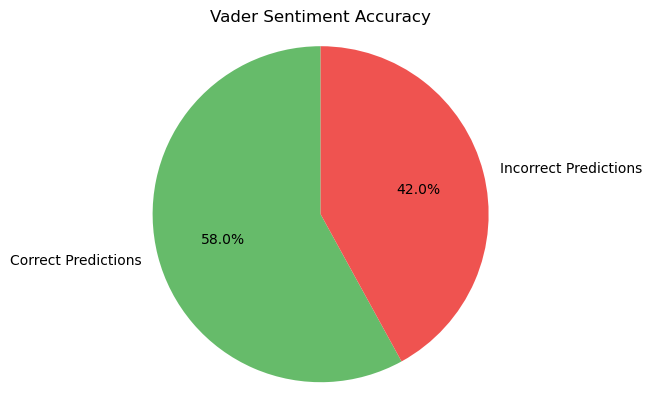

In [242]:
# Plot Vader sentiment accuracy
import matplotlib.pyplot as plt
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [len(dt[dt['Text_sentiment_numeric'] == dt['Vader_Prediction']]), len(dt[dt['Text_sentiment_numeric'] != dt['Vader_Prediction']])]
colors = ['#66BB6A', '#EF5350']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Vader Sentiment Accuracy')
plt.show()

compound as a separate column and all values greater than zeroes will be considered a positive review and all values less than zero would be considered as a negative review.

In [243]:
# Replace 'df' with the name of your dataframe
dt.to_csv('data.csv', index=False) 

### Key take-aways

> Adds two new columns to the DataFrame <br>
> <u>vader_score:</u>   The compound score from VADER <br>
> <u>vader_sentiment:</u>   The categorical sentiment<br>
> The conversion of sentoment to numerical is done for both original sentiments and VADER predictions.<br>
> <u>Compound Score:</u> A normalized score between -1 (most negative) and 1 (most positive). Computed by summing the valence scores of each word in the text
> <u>Valence score:</u> The measure of the emotional positivity or negativity of a word

In [244]:
dt.head()

,Author,Score,Comment Count,Text_sentiment_x,lemma_cleaned_text,Text_sentiment_numeric,Vader_Scores,Vader_Prediction
0,RandomInvestor98,31906,1644,Positive,nancy pelosis husband sold 500k worth visa — w...,1,0.0000,1
1,Sad_Nefariousness10,29016,11819,Positive,bought 700k worth today tldr grandma died mont...,1,0.7717,1
2,Efficient_Deer_8605,12336,1351,Positive,bought 700k worth cheap rn,1,0.2263,1
3,sco-go,14514,1089,Neutral,guy spent 700k inheritance bullish,0,0.0000,1
4,Suspicious-Bad4703,11757,1014,Neutral,japanese crashing,0,0.0000,1


### Naive Bayes classifier


In [245]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

%matplotlib inline

In [246]:
# Assuming df is your DataFrame and you want to rename a column
dt = dt.rename(columns={'lemma_cleaned_text': 'text'})


In [247]:
# Replace empty strings with a neutral sentiment or placeholder text
dt['text'] = dt['text'].replace('', 'No sentiment available')  # Example placeholder


### Tokenization


In [248]:
tokenized_review=dt['text'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [nancy, pelosis, husband, sold, 500k, worth, v...
1    [bought, 700k, worth, today, tldr, grandma, di...
2                     [bought, 700k, worth, cheap, rn]
3             [guy, spent, 700k, inheritance, bullish]
4                                 [japanese, crashing]
Name: text, dtype: object

In [249]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(dt['text'])

c:\Users\91829\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [250]:
from sklearn.model_selection import train_test_split
X=text_counts
y=dt['Vader_Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [251]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
# predicted = CNB.predict(X_test)
# accuracy_score = metrics.accuracy_score(predicted, y_test)

# print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
# print('Confusion Matrix:')
# print(pd.DataFrame(confusion_matrix(y_test, predicted)))
# print('Classification Report:')
# print(classification_report(y_test, predicted))

In [252]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

# predicted = MNB.predict(X_test)
# accuracy_score = metrics.accuracy_score(predicted, y_test)

# print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
# print('Confusion Matrix:')
# print(pd.DataFrame(confusion_matrix(y_test, predicted)))
# print('Classification Report:')
# print(classification_report(y_test, predicted))

MultinomialNB()

In [253]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

# predicted = BNB.predict(X_test)
# accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

# print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
# print('Confusion Matrix:')
# print(pd.DataFrame(confusion_matrix(y_test, predicted)))
# print('Classification Report:')
# print(classification_report(y_test, predicted))

BernoulliNB()

### TF-IDF

In [254]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(dt['text'])

In [255]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
x_train, x_test, y_train, y_test = train_test_split(text_count_2, dt['Vader_Prediction'],test_size=0.20,random_state=30)

In [256]:
#fitting the model with BNB
BNB.fit(x_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 70.00%


In [257]:
# fitting the model with CNB
CNB.fit(x_train, y_train)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

accuracy_score_cnb = 57.50%


In [258]:
#fitting the model with MNB
MNB.fit(x_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 72.50%


## Text-Blob

In [259]:
from textblob import TextBlob
# Step 1: Define function to extract polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Step 2: Apply the sentiment function to the 'text' column
dt[['polarity', 'subjectivity']] = dt['text'].apply(lambda text: pd.Series(get_sentiment(text)))

# Step 3: Function to convert polarity into categorical sentiment
def categorize_sentiment(polarity):
    if polarity > 1:
        return 1  # Positive sentiment
    elif polarity == 0:
        return 0  # Neutral sentiment
    else:
        return -1  # Negative sentiment

# Step 4: Apply the categorization function to the polarity column
dt['predicted_sentiment'] = dt['polarity'].apply(categorize_sentiment)

# Step 5: Calculate accuracy by comparing predicted sentiment to true sentiment
correct_predictions = sum(dt['predicted_sentiment'] == dt['Text_sentiment_numeric'])
accuracy = correct_predictions / len(dt) * 100

# Step 6: Display the DataFrame with polarity, subjectivity, predicted sentiment, and accuracy
(dt[['text', 'polarity', 'subjectivity', 'predicted_sentiment', 'Text_sentiment_numeric']].head())
print(f"\nAccuracy of TextBlob Sentiment Analysis: {accuracy:.2f}%")


Accuracy of TextBlob Sentiment Analysis: 39.50%


### Flair

In [260]:
!pip install flair

^C


In [105]:
empty_strings_count = (dt['text'].str.strip() == '').sum()
print(f"Number of empty strings in 'text': {empty_strings_count}")


Number of empty strings in 'text': 0


In [106]:
# Replace empty strings with a neutral sentiment or placeholder text
dt['text'] = dt['text'].replace('', 'No sentiment available')  # Example placeholder


In [107]:
from flair.nn import Classifier
from flair.splitter import SegtokSentenceSplitter
import pandas as pd

# Initialize sentence splitter
splitter = SegtokSentenceSplitter()

# Load the NER model
tagger = Classifier.load('ner')

# Lists to hold predictions and true labels
predicted_labels = []
true_labels = []

# Iterate through each row in the DataFrame
for index, row in dt.iterrows():
    # Split the text into sentences
    sentences = splitter.split(row['text'])
    
    # Predict tags for sentences
    tagger.predict(sentences)
    
    # Process each sentence to determine predicted labels
    for sentence in sentences:
        entities = sentence.get_spans('ner')  # Get the predicted entities
        
        # Check for specific keywords to determine the predicted label
        if any(keyword in sentence.to_plain_string() for keyword in ['Purchased', 'buy', 'good', 'bought']):
            predicted_labels.append(1)  # Positive sentiment
        else:
            predicted_labels.append(0)  # Negative or neutral sentiment
    
    # Append the true sentiment label for this row
    true_labels.append(row['Text_sentiment_numeric'])

# Calculate accuracy
correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct_predictions / len(true_labels) * 100

# Add predicted labels to the DataFrame
dt['predicted_labels'] = predicted_labels

# Print the DataFrame with sentences, predicted, and true labels
print(dt[['text', 'predicted_labels', 'Text_sentiment_numeric']])

# Print the accuracy
print(f"\nAccuracy of Flair NER: {accuracy:.2f}%")


2024-10-08 23:52:25,815 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
                                                  text  predicted_labels  \
0    nancy pelosis husband sold 500k worth visa — w...                 0   
1    bought 700k worth today tldr grandma died mont...                 1   
2                           bought 700k worth cheap rn                 1   
3                   guy spent 700k inheritance bullish                 0   
4                                    japanese crashing                 0   
..                                                 ...               ...   
195      snapchat founders lose billions violent crash                 0   
196               txse texas exchange announced yeehaw                 0   
197  billionaire investor mark cuban reddit traders...                 0   
198  dumb movie lost 15m